### Proyecto Capstone - Predicción de Ventas (Día 1)
Autor: Luz Paez

1. Cargar datos  
2. Limpieza de datos  
3. Visualización  
4. Modelo de regresión lineal  
5. Evaluación del modelo  

**Objetivo:** 

Desarrollar una solución básica de ciencia de datos mediante un modelo predictivo de regresión lineal que permita estimar la demanda de productos a partir de datos históricos de ventas

**Importación de las librerias**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


**Cargar los datos desde la carpeta data**

In [45]:
ruta = "../data/ventas.csv" # Se accede a la ruta donde se encuentran los datos del csv de ventas
df = pd.read_csv(ruta)  # Lee el archivo csv en la ruta especificada

print("Datos cargados correctamente.") # Imprimir para verificar que cargaron correctamente los datos
df.head() #Se muestran las primeras 5 filas del data frame


Datos cargados correctamente.


,Year,Month,Customer,Product,Units_Sold,Price_per_Unit,Revenue,Customer_Name
0,2019,Jan,Customer 103,Product D,93,22.426305,2085.646368,Joshua Moore
1,2019,Jan,Customer 72,Product E,21,19.821771,416.257188,Joseph Wilson
2,2019,Jan,Customer 467,Product C,75,87.286734,6546.505039,Hannah Harris
3,2019,Jan,Customer 100,Product C,22,10.359100,227.900200,Emily Davis
4,2019,Jan,Customer 344,Product D,30,25.172216,755.166465,Rachel Brown


lo que indica cada columna es: 
* Year -->	Año de la venta.
* Month -->	Mes de la venta.
* Customer -->	ID o código del cliente.
* Product -->	Producto vendido.
* Units_Sold --> Cantidad de unidades vendidas en esa transacción.
* Price_per_Unit --> Precio por unidad del producto.
* Revenue --> Ingreso total generado en esa venta (Units_Sold × Price_per_Unit).
* Customer_Name	--> Nombre real del cliente.

**Limpieza de datos**
En este paso se procede a:
1. Mostrar las dimensiones del dataset
2. Mostrar cuantos valores nulos (o faltantes) hay en cada columna
3. Mostrar el tipo de dato de cada columna
4. Contar cuantas filas estan duplicadas en el DataFrame
5. Elimina filas duplicadas del DataFrame
6. Elimina filas que contienen al menos un valor nulo

En esta celda se explora la estructura del dataset, se detectan los problemas comunes como datos faltantes y duplicados y se limpian esos problemas para asegurar que el analisis sea confiable

In [46]:
# Muestra el número de filas y columnas del DataFrame
print("Dimensiones del dataset:", df.shape)
print("------------------------------------------------------------------------------------")

# Muestra cuántos valores nulos hay en cada columna
print("Valores nulos por columna:")
print(df.isnull().sum())

print("------------------------------------------------------------------------------------")

# Muestra el tipo de dato de cada columna 
print("Tipos de datos:")
print(df.dtypes)

print("------------------------------------------------------------------------------------")

# Muestra cuántas filas están duplicadas en el DataFrame
print("Número de duplicados:", df.duplicated().sum())

# Elimina las filas duplicadas, si las hay
df = df.drop_duplicates()

# Elimina las filas que contienen al menos un valor nulo
df = df.dropna()



Dimensiones del dataset: (4980, 8)
------------------------------------------------------------------------------------
Valores nulos por columna:
Year              0
Month             0
Customer          0
Product           0
Units_Sold        0
Price_per_Unit    0
Revenue           0
Customer_Name     0
dtype: int64
------------------------------------------------------------------------------------
Tipos de datos:
Year                int64
Month              object
Customer           object
Product            object
Units_Sold          int64
Price_per_Unit    float64
Revenue           float64
Customer_Name      object
dtype: object
------------------------------------------------------------------------------------
Número de duplicados: 0


**Visualización de Relaciones Clave**

El objetivo es identificar qué variables se relacionan con Revenue para usarlas luego como predictores del modelo

Se va a iniciar con estas combinaciones:
1. Price_per_Unit vs Revenue
2. Units_Sold vs Revenue

**Visualizar: Units_Sold vs Revenue**

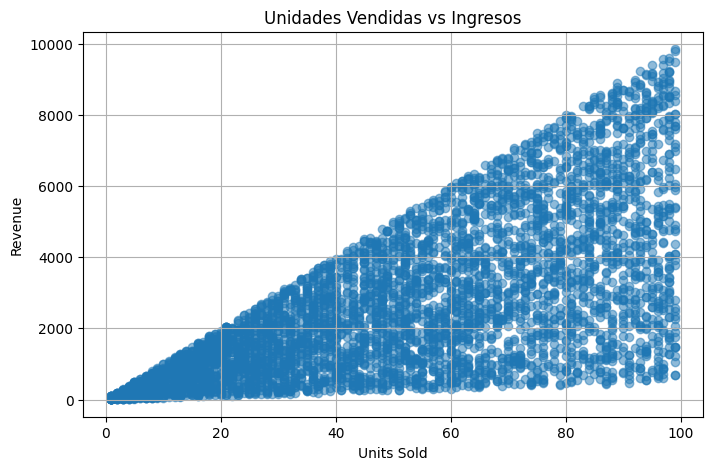

In [47]:
# Establece el tamaño de la figura del gráfico (ancho=8, alto=5)
plt.figure(figsize=(8,5))

# Crea un diagrama de dispersión (scatter plot) entre 'Units_Sold' y 'Revenue'
plt.scatter(df['Units_Sold'], df['Revenue'], alpha=0.5) # El parámetro alpha=0.5 hace que los puntos sean semitransparentes, facilitando la visualización si hay muchos

# Título del gráfico
plt.title('Unidades Vendidas vs Ingresos')

plt.xlabel('Units Sold') # Etiqueta del eje X
plt.ylabel('Revenue') # Etiqueta del eje Y

plt.grid(True) # Activa la cuadrícula para facilitar la lectura del gráfico
plt.show() # Muestra el gráfico


**Visualizar: Price_per_Unit vs Revenue**

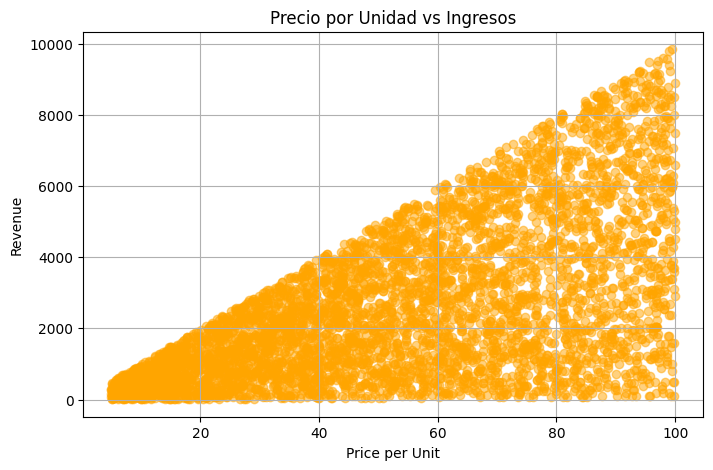

In [48]:
# Establece el tamaño de la figura del gráfico (ancho=8, alto=5)
plt.figure(figsize=(8,5))

# Crea un diagrama de dispersión (scatter plot) entre 'Price_per_Unit' y 'Revenue'
# El parámetro alpha=0.5 hace que los puntos sean semitransparentes
# El parámetro color='orange' cambia el color de los puntos a naranja para diferenciarlos
plt.scatter(df['Price_per_Unit'], df['Revenue'], alpha=0.5, color='orange')

plt.title('Precio por Unidad vs Ingresos')# Título del gráfico
plt.xlabel('Price per Unit') # Etiqueta del eje X
plt.ylabel('Revenue') # Etiqueta del eje Y

plt.grid(True) # Activa la cuadrícula para facilitar la lectura del gráfico
plt.show()# Muestra el gráfico


**Calcular la correlacion con Revenue**

In [49]:
# Calcula la matriz de correlación entre todas las columnas numéricas del DataFrame
correlaciones = df.corr(numeric_only=True) # El parámetro numeric_only=True asegura que solo se incluyan columnas con valores numéricos
print("Correlación con Revenue:")

print(correlaciones['Revenue'].sort_values(ascending=False)) # Muestra las correlaciones ordenadas de mayor a menor respecto a la columna 'Revenue'


Correlación con Revenue:
Revenue           1.000000
Units_Sold        0.693763
Price_per_Unit    0.626828
Year             -0.012778
Name: Revenue, dtype: float64


Aqui la correlación indica que:
* Units_Sold (0.69) da buena señal para usarse como predictor.
* Price_per_Unit (0.63) también es relevante.

Se puede ver por la posibilidad de realizar dos modelos, uno simple y otro multivariado

**1. Modelo simple con Units_Sold**
Modelo simple solo usa las unidades vendidas para predecir el revenue.

In [56]:
X_simple = df[['Units_Sold']]  # Variable independiente
y = df['Revenue']              # Variable objetivo

# Se crea una instancia del modelo de regresión lineal
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y) # Se entrena el modelo con los datos definidos (X_simple e y)

# Se imprime la información del modelo entrenado
print("Modelo Simple:")

# Muestra el coeficiente (pendiente) que indica cuánto cambia 'Revenue' por unidad adicional vendida
print(f" Coeficiente (pendiente) Units_Sold: {modelo_simple.coef_[0]:.4f}")

# Muestra el intercepto (valor de Revenue cuando Units_Sold es 0)
print(f" Intercepto: {modelo_simple.intercept_:.4f}")
print()

Modelo Simple:
 Coeficiente (pendiente) Units_Sold: 53.0283
 Intercepto: -36.8536



**2. Modelo múltiple con Units_Sold y Price_per_Unit**
modelo multiple usa unidades vendidas y precio por unidad, para una predicción más completa.

In [51]:
# --- Modelo Multivariado con 'Units_Sold' y 'Price_per_Unit' como variables independientes ---

X_multi = df[['Units_Sold', 'Price_per_Unit']] # Se define X_multi como un DataFrame con las dos variables predictoras

modelo_multi = LinearRegression() # Se crea una nueva instancia del modelo de regresión lineal
modelo_multi.fit(X_multi, y) # Se entrena el modelo multivariado con las variables X_multi e y (Revenue)

# Se imprime información del modelo entrenado
print("Modelo Multivariado:")

# Muestra los coeficientes (pendientes) para cada variable independiente
print(f" Coeficientes (Units_Sold, Price_per_Unit): {modelo_multi.coef_}")

# Muestra el intercepto del modelo (valor estimado de Revenue cuando ambas variables son 0)
print(f" Intercepto: {modelo_multi.intercept_:.4f}")


Modelo Multivariado:
 Coeficientes (Units_Sold, Price_per_Unit): [52.84406132 49.59631873]
 Intercepto: -2617.7708


**Evaluación de los modelos**

In [57]:
# Predicciones del modelo simple
y_pred_simple = modelo_simple.predict(X_simple)

# Cálculo de métricas para el modelo simple
mae_simple = mean_absolute_error(y, y_pred_simple) #Error Absoluto Medio
mse_simple = mean_squared_error(y, y_pred_simple) # Error Cuadrático Medio
r2_simple = r2_score(y, y_pred_simple) # coeficiente de determinación - qué tan bien explica el modelo la variabilidad de los datos

print("Evaluación del Modelo Simple:")
print(f" MAE (Error absoluto medio): {mae_simple:.2f}")
print(f" MSE (Error cuadrático medio): {mse_simple:.2f}")
print(f" R² (Explicación de la varianza): {r2_simple:.4f}\n")

# Predicciones del modelo multivariado
y_pred_multi = modelo_multi.predict(X_multi)

# Cálculo de métricas para el modelo multivariado
mae_multi = mean_absolute_error(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

print("Evaluación del Modelo Multivariado:")
print(f" MAE (Error absoluto medio): {mae_multi:.2f}")
print(f" MSE (Error cuadrático medio): {mse_multi:.2f}")
print(f" R² (Explicación de la varianza): {r2_multi:.4f}")


Evaluación del Modelo Simple:
 MAE (Error absoluto medio): 1178.38
 MSE (Error cuadrático medio): 2475358.00
 R² (Explicación de la varianza): 0.4813

Evaluación del Modelo Multivariado:
 MAE (Error absoluto medio): 587.64
 MSE (Error cuadrático medio): 616225.34
 R² (Explicación de la varianza): 0.8709


**Visualización de las predicciones vs valores reales**

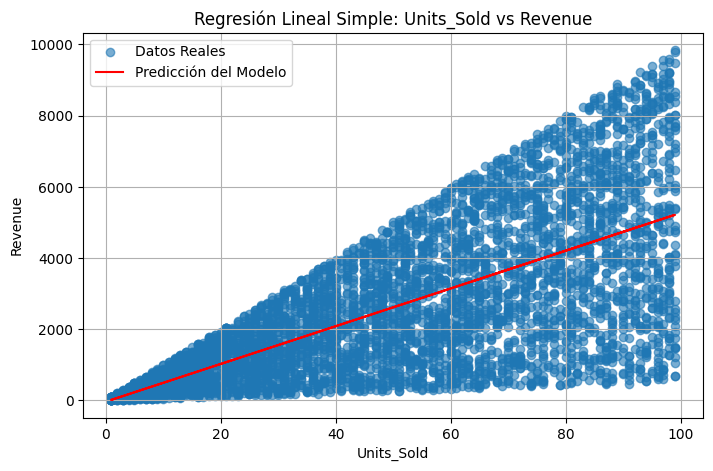

In [53]:
# --- Gráfica para el modelo de regresión lineal simple (una variable) ---
 
plt.figure(figsize=(8,5)) # Define el tamaño de la figura del gráfico

# Dibuja un diagrama de dispersión con los datos reales (Units_Sold vs Revenue)
plt.scatter(X_simple, y, label='Datos Reales', alpha=0.6) # 'alpha=0.6' hace que los puntos sean algo transparentes

# Dibuja la línea del modelo de regresión (predicciones del modelo simple)
plt.plot(X_simple, y_pred_simple, color='red', label='Predicción del Modelo') # 'color=red' muestra la línea de regresión en rojo

plt.title('Regresión Lineal Simple: Units_Sold vs Revenue') # Título del gráfico
plt.xlabel('Units_Sold') # Etiqueta del eje X
plt.ylabel('Revenue') # Etiqueta del eje Y

plt.legend() # Muestra la leyenda para diferenciar los datos reales de la línea del modelo
plt.grid(True) # Activa la cuadrícula para facilitar la lectura
plt.show() # Muestra el gráfico completo



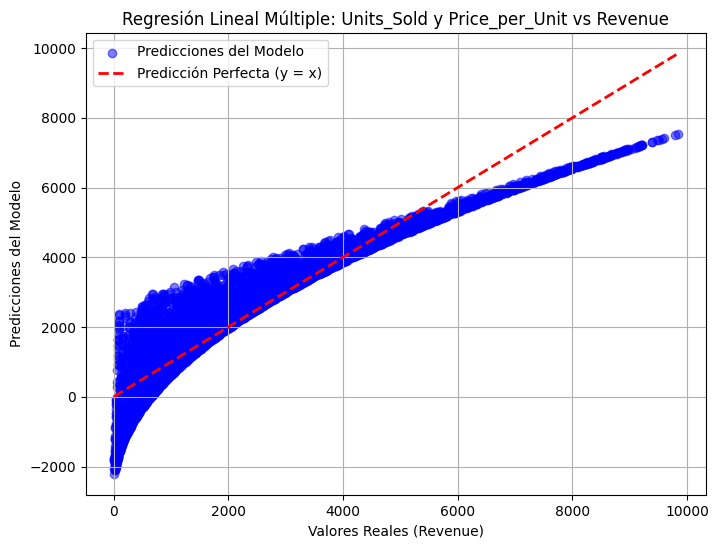

In [54]:
# --- Gráfica para evaluar el modelo multivariado (valores reales vs predicciones) ---

plt.figure(figsize=(8,6)) # Establece el tamaño de la figura del gráfico

# Dibuja un diagrama de dispersión entre los valores reales y las predicciones
# Los puntos representan cómo se alinean las predicciones del modelo con los datos reales
plt.scatter(y, y_pred_multi, alpha=0.5, color='blue', label='Predicciones del Modelo')

# Dibuja una línea roja discontinua que representa la predicción perfecta (y = x)
# Si el modelo fuera perfecto, todos los puntos caerían exactamente sobre esta línea
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2 , label='Predicción Perfecta (y = x)')  # Línea ideal

plt.xlabel('Valores Reales (Revenue)') # Etiqueta del eje X
plt.ylabel('Predicciones del Modelo') # Etiqueta del eje Y


# Título descriptivo
plt.title('Comparación entre Predicciones y Valores Reales - Regresión Lineal Múltiple')

plt.title('Regresión Lineal Múltiple: Units_Sold y Price_per_Unit vs Revenue')
plt.legend()
plt.grid(True) # Activa la cuadrícula para facilitar la lectura del gráfico
plt.show() # Muestra el gráfico final



In [55]:
import joblib

# Guardar el modelo multivariado dentro de la carpeta 'src
joblib.dump(modelo_multi, '../src/modelo.joblib')
print("Modelo guardado como src/modelo.joblib")



Modelo guardado como src/modelo.joblib
